### Multivariate Analysis

As our world is somewhat complex and one result might be influenced by various elements (variables?), we sometimes need for measures.

How much rent is fair for a 2 bedroom and one bathroom with a balcony versus a single room with one bathroom?  
How much cheaper is a used car, if it has less mileage, but is somewhat older than a newer one?

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns 

In [41]:

# Loading the csv dataset in a dataframe
df = pd.read_csv('ToyotaCorolla.csv')

#Actual answer to the question
df.shape

(1427, 36)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427 entries, 0 to 1426
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1427 non-null   int64 
 1   Model             1427 non-null   object
 2   Price             1427 non-null   int64 
 3   Age               1427 non-null   int64 
 4   Mfg_Month         1427 non-null   int64 
 5   Mfg_Year          1427 non-null   int64 
 6   KM                1427 non-null   int64 
 7   Fuel_Type         1427 non-null   object
 8   HP                1427 non-null   int64 
 9   Met_Color         1427 non-null   int64 
 10  Automatic         1427 non-null   int64 
 11  cc                1427 non-null   int64 
 12  Doors             1427 non-null   int64 
 13  Cylinders         1427 non-null   int64 
 14  Gears             1427 non-null   int64 
 15  Quarterly_Tax     1427 non-null   int64 
 16  Weight            1427 non-null   int64 
 17  Mfr_Guarantee 

In [43]:
df.describe()

,Id,Price,Age,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,...,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000,1427.000000
mean,717.036440,11017.934828,55.831815,5.540995,1999.635599,68852.239664,101.583041,0.676244,0.053959,1578.391731,...,0.583742,0.565522,0.978276,0.147162,0.257884,0.299229,0.770848,0.205326,0.146461,0.278907
std,413.869147,3469.246072,18.599523,3.351367,1.540139,37407.841512,14.981450,0.468072,0.226017,425.215342,...,0.493110,0.495862,0.145832,0.354391,0.437623,0.458081,0.420435,0.404081,0.353692,0.448619
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,359.500000,8950.000000,44.000000,3.000000,1998.000000,43340.000000,90.000000,0.000000,0.000000,1400.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,717.000000,9950.000000,61.000000,5.000000,1999.000000,63635.000000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1074.500000,11950.000000,70.000000,8.000000,2001.000000,87316.000000,110.000000,1.000000,0.000000,1600.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1433.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Age', ylabel='Count'>

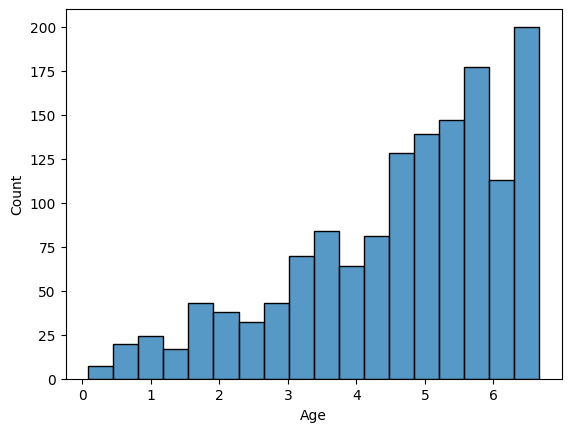

In [44]:
## Personally, I dont want to think in months, but years.
x = df["Age"] / 12
sns.histplot(x)

<Axes: xlabel='HP', ylabel='Count'>

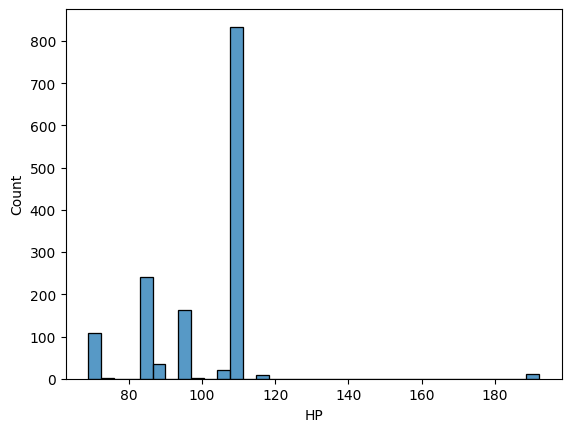

In [45]:
sns.histplot(df["HP"])

<Axes: xlabel='KM', ylabel='Count'>

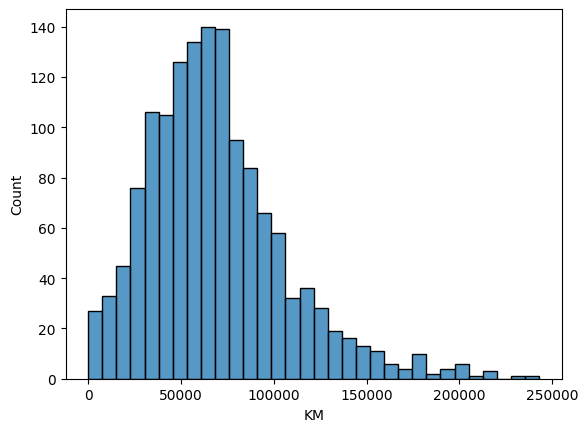

In [46]:
sns.histplot(df["KM"])

<Axes: xlabel='Powered_Windows', ylabel='Count'>

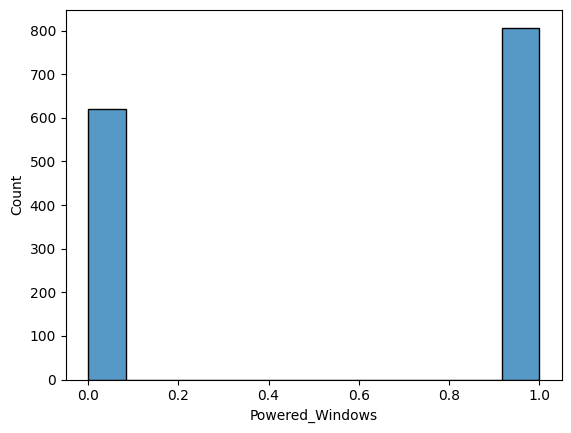

In [47]:
# Graphical overview of the dichotomy (= "dividing in two")
sns.histplot(df["Powered_Windows"])

We have a medium dataset, but a lot of information about each individual entry ("a broad description" of each entry)

#### What makes a useful dependent (='output') variable?
### Price!

In [48]:
df["Price"].describe()

count     1427.000000
mean     11017.934828
std       3469.246072
min       4350.000000
25%       8950.000000
50%       9950.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Count'>

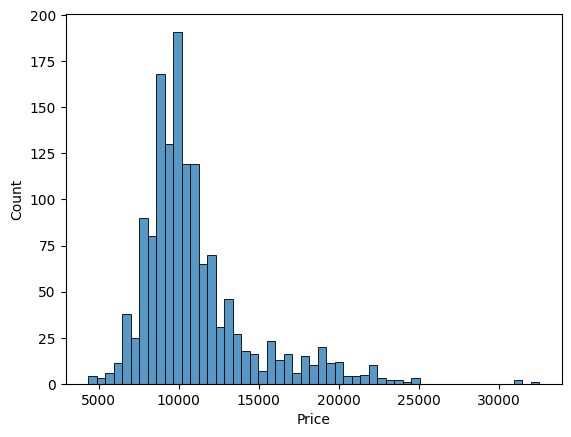

In [49]:
sns.histplot(data = df["Price"])

In [50]:
## Set price as the Y - variable (output):

y = df['Price'].values 

## Choose a set of X's - reasons that influence the price of a car
## Horsepower, Age and Mileage

X = df[['Age', 'KM', 'Powered_Windows']].values

## Task: Let's build an estimator model, that takes various independent (='input') variables and predicts the price, using a multivariate regression.


In [51]:
import sklearn
from sklearn import linear_model 

regr = linear_model.LinearRegression()
regr.fit(X, y) 

LinearRegression()

In [52]:
## Predict the price of a car, that has 108k kilometers, is 64 months old and has powered windows?

pricePrediction = regr.predict([[64, 108000, 0]])
print (pricePrediction)

[8697.00601983]


In [53]:
## How much money would the model predict for that same car, but WITH powered windows?
pricePrediction = regr.predict([[64, 108000, 1]])
print (pricePrediction)

[9588.00089903]


In [54]:
print (regr.predict([[64, 108000, 1]]) - (regr.predict([[64, 108000, 0]])))

[890.99487921]


In [55]:
### Trying to sell my 6 month old car, barely driven (4500 km) with no powered windows.
pricePrediction = regr.predict([[6, 4500, 0]])
print (pricePrediction)

[18187.89197423]


In [56]:
## One last special case. What happens if my car has 0 months, zero kilometers and no powered windows?
pricePrediction = regr.predict([[0, 0, 0]])
print (pricePrediction)

[19048.34664183]


What this number means mathematically and in context with the data set, is **part of the next assignment**.

If you have ever entered some rough data in any online estimator and it immediately presented a brief result (_combined with a newsletter opportunity to get more information..._) you know now, how they do it.

But... how does an increase of one, result in a different price?

In [57]:
# What are the coefficients of Age, KM and Powered Windows?
# X = df[['Age', 'KM', 'Powered_Windows']].values
print(regr.coef_) 

[-1.28744643e+02 -1.95526250e-02  8.90994879e+02]


Reading like:  
An increase of one Month *decreases* the price by **148**  
An increase of one kilometer *decreased* the value by **0.0163**  
Having a powered window *increased* the value by approx. **840**  

Or in general terms:
price = (-148 * $age_in_months) + (-0.0163 * $kilometer) + 840 * [$window_yes_no]

or in general terms: f(x) = m0* x0 + m1* x1 + ... + mn * xn + b